In [79]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"

import pandas as pd                                 # Data Frame

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

*   age: age in year
*   sex: 1 = male + O = female
*   cp: chest pain type
*   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
*   chol: serum cholestoral in mg/dl
*   fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   restecg: resting electrocardiographic results
*   thalach: maximum heart rate achieved
*   exang: exercise induced angina (1 = yes; 0 = no)
*   oldpeak:  ST depression induced by exercise relative to rest
*   slope: the slope of the peak exercise ST segment
*   ca: number of major vessels (0-3) colored by flourosopy
*   thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
*   target: 0 = no disease + 1 = disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

Get general info about the dataset. Are there any values missing?

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are 2 values for target (0 and 1), so this is a binary classification.   
Before we can start the classification, we have to know if this is a skewed dataset.

In [82]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

What is X and what is y?

In [83]:
X_pre_transform = df.drop("target", axis = 1)
y = df['target']    

Use min-max scaling on X.  

In [84]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_tr = min_max_scaler.fit_transform(X_pre_transform)

Put the transformed data back into a dataframe.  
Take a look at the data in the dataframe.

In [85]:
X_transform = pd.DataFrame(X_tr, columns=X_pre_transform.columns)
X_transform.head()

age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  
0  0.161290    1.0  0.50  1.000000  
1  0.500000    0.0  0.00  1.000000  
2  0.419355    0.0  0.00  1.000000  
3  0.000000    1.0  0.25  1.000000  
4  0.306452    0.5  0.75  0.666667

What is X_train, y_train, X_test, y_test?

In [86]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, random_state=42)    # default test size = 0.25

What is the number of records in X_train en X_test?

In [87]:
print(f"The number of records in X_train is: {len(X_train)}")
print(f"The number of records in X_test is: {len(X_test)}")

The number of records in X_train is: 768
The number of records in X_test is: 257


Use the SGD classifier to do the classification.  
Make sure the results are reproducible.

In [88]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [89]:
y_predict = sgd_clf.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.7704280155642024


What is the accuracy of the model?  
Use K-fold cross-validation. Make the following overview.  
Why does the overview starts with k = 2 instead of k = 1?  

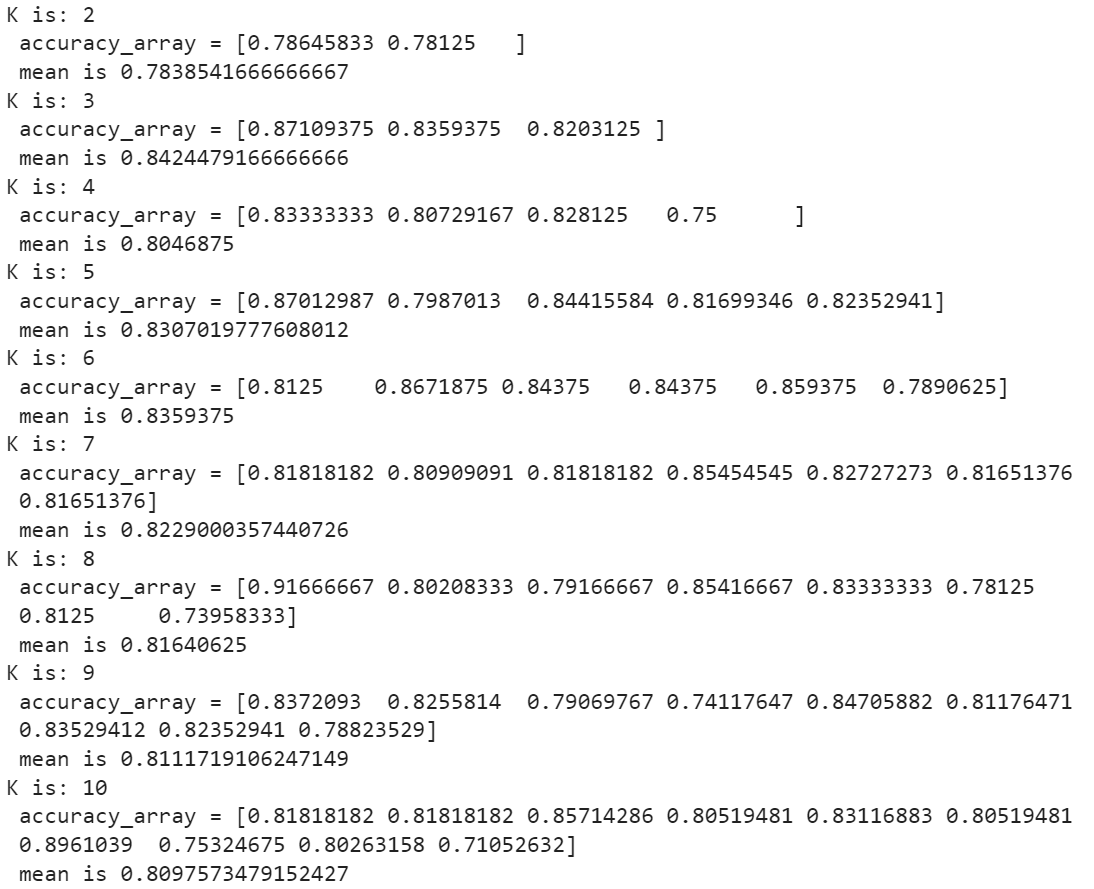

In [91]:
from sklearn.model_selection import cross_val_score

for k in range(2, 11):
  scores = cross_val_score(sgd_clf, X_train, y_train, cv=k, scoring="accuracy")
  print(f'K is: {k} \n accuracy_array = {scores} \n mean is {np.mean(scores)}')

K is: 2 
 accuracy_array = [0.84635417 0.828125  ] 
 mean is 0.8372395833333333
K is: 3 
 accuracy_array = [0.86328125 0.86328125 0.81640625] 
 mean is 0.84765625
K is: 4 
 accuracy_array = [0.81770833 0.83333333 0.875      0.68229167] 
 mean is 0.8020833333333334
K is: 5 
 accuracy_array = [0.76623377 0.81818182 0.79220779 0.90196078 0.80392157] 
 mean is 0.8165011459129106
K is: 6 
 accuracy_array = [0.8515625 0.8203125 0.890625  0.7890625 0.8359375 0.8203125] 
 mean is 0.8346354166666666
K is: 7 
 accuracy_array = [0.83636364 0.82727273 0.84545455 0.84545455 0.84545455 0.82568807
 0.81651376] 
 mean is 0.8346002621231979
K is: 8 
 accuracy_array = [0.83333333 0.84375    0.82291667 0.875      0.86458333 0.88541667
 0.82291667 0.77083333] 
 mean is 0.83984375
K is: 9 
 accuracy_array = [0.84883721 0.79069767 0.89534884 0.82352941 0.83529412 0.82352941
 0.87058824 0.82352941 0.75294118] 
 mean is 0.8293661650706794
K is: 10 
 accuracy_array = [0.87012987 0.87012987 0.79220779 0.8831168

The following code shows how to implement Leave-One-Out Cross-Validation (LOOCV):  
*   All but one observation of the training set is used to build the model.
*   Use the model to predict the response value of the one observation left out of the model
*   This is repeated for each observation in the dataset

In [92]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
scores = cross_val_score(sgd_clf, X_train, y_train, cv=cv, scoring="accuracy")
print(f"The mean in case of LOOCV is: {np.mean(scores)}")


The mean in case of LOOCV is: 0.8359375


Give the confusion matrix for the best value of k that you obtained before.

In [93]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[289  78]
 [ 39 362]]


Visualize the confusion matrix

Text(91.68, 0.5, 'Actual class')

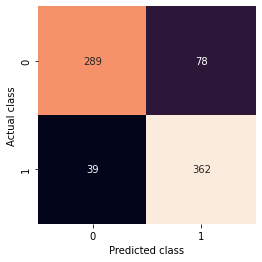

In [94]:
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

Give the number of True Negatives, True Positives, False Positives, False Negatives.  
TN = 289   
FN = 39    
FP = 78   
TP = 362

In [95]:
TN = conf_mx[0][0]
FN = conf_mx[1][0]
FP = conf_mx[0][1]
TP = conf_mx[1][1]

print(f"TN = {TN} \nFN = {FN} \nFP = {FP} \nTP = {TP}")

TN = 289 
FN = 39 
FP = 78 
TP = 362


What is worse in this case: False Positives or False Negatives?

Calculate the precision and the recall using the above values.  

In [96]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"The precision is: {precision}")
print(f"The recall is: {recall}")

The precision is: 0.8227272727272728
The recall is: 0.9027431421446384


Calculate the precision and recall using sklearn  
The precision is: 0.8227272727272728  
The recall is: 0.9027431421446384

In [97]:
from sklearn.metrics import precision_score, recall_score
print(f"The precision is: {precision_score(y_train, y_train_pred)}")
print(f"The recall is: {recall_score(y_train, y_train_pred)}")

The precision is: 0.8227272727272728
The recall is: 0.9027431421446384


What is meant with precision and recall in this context?

precision: aandeel van al degenen waarvan we zeggen dat ze een hartziekte zullen krijgen, die er ook effectief een hebben.   
recall: aandeel van alle mensen met hartziekte die we ook effectief detecteren. 

Calculate F1 score using the above values.  
F1 is: 0.8608799048751486


In [98]:
f1 = 2 / (1/precision + 1/recall)
print(f"F1 is: {f1}")

F1 is: 0.8608799048751486


Calculate F1 score using the sklearn.  
F1 is: 0.8608799048751486

In [99]:
from sklearn.metrics import f1_score
print(f"F1 is: {f1_score(y_train, y_train_pred)}")

F1 is: 0.8608799048751486


With this number of FN, no doctor is going to use this system. You need to improve the system.  
Is it a good idea to try to improve the precision or recall in this case by changing the threshold?  
You decide to make the following plot.

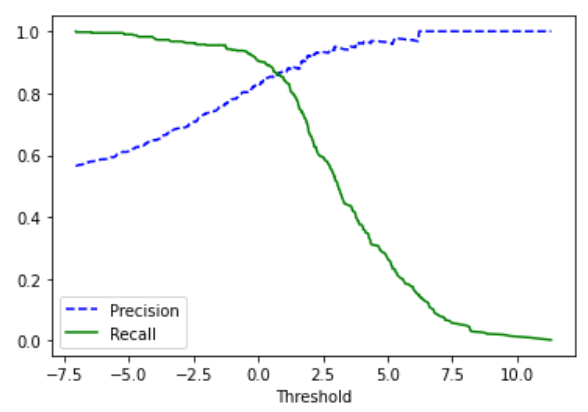

To make this plot, you will first need to get the scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of predictions.

In [100]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

With these scores you can compute precision and recall for all possible thresholds using the precision_recall_curve() function

In [101]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Now, you can plot precision and recall as functions of the threshold value using Matplotlib.

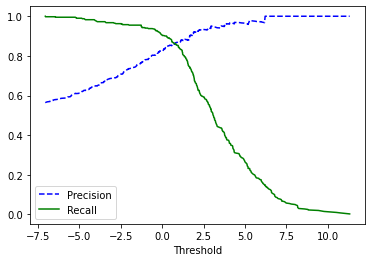

In [102]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.legend(loc="lower left")
  plt.xlabel("Threshold")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

What would be a good value for the threshold based on this plot?


Just before recall drops: +/- -1.0

To decrease the false negatives we have to increase the recall (or true positive rate). Determine the threshold for a recall of 0.95 (iso 0.90)

In [103]:
thresholds[:20]


array([-7.04446588, -7.030411  , -7.00994976, -6.97052846, -6.91441244,
       -6.76427765, -6.74479458, -6.7429346 , -6.69205879, -6.64629767,
       -6.58871816, -6.58608489, -6.55664865, -6.48525224, -6.43767852,
       -6.42640168, -6.223172  , -6.19224726, -6.18315343, -6.16609976])

In [104]:
recalls[:20]

array([1.        , 0.99750623, 0.99750623, 0.99750623, 0.99750623,
       0.99750623, 0.99750623, 0.99750623, 0.99750623, 0.99750623,
       0.99750623, 0.99750623, 0.99750623, 0.99750623, 0.99750623,
       0.99501247, 0.99501247, 0.99501247, 0.99501247, 0.99501247])

In [105]:
threshold_95_recall = thresholds[np.argmax(recalls <= 0.95)]
y_train_pred_95 = (y_scores >= threshold_95_recall)
print(f"The precision is: {precision_score(y_train, y_train_pred_95)}")
print(f"The recall is: {recall_score(y_train, y_train_pred_95)}")

The precision is: 0.7645875251509054
The recall is: 0.9476309226932669


Show the confusion matrix again with this new threshold value to see if FN has improved.

In [106]:
conf_mx = confusion_matrix(y_train, y_train_pred_95)
print(conf_mx)

[[250 117]
 [ 21 380]]


Text(91.68, 0.5, 'Actual class')

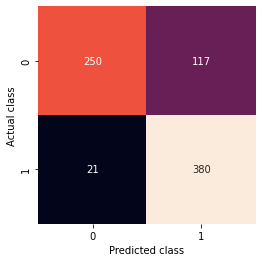

In [107]:
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

In [108]:
TN = conf_mx[0][0]
FN = conf_mx[1][0]
FP = conf_mx[0][1]
TP = conf_mx[1][1]

print(f"TN = {TN} \nFN = {FN} \nFP = {FP} \nTP = {TP}")

TN = 250 
FN = 21 
FP = 117 
TP = 380


FN has decreased from 39 to 21. 

Is it perhaps useful to plot the ROC curve? The ROC curve plots the true positive rate against the false positive rate.  
To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function.

TPR = recall =$\frac{TP}{TP + FN}$

FPR = $\frac{FP}{FP + TN}$

In [109]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

Then you can plot the FPR against the TPR using Matplotlib.

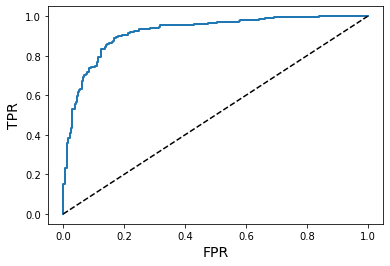

In [110]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.xlabel("FPR", fontsize=14)
  plt.ylabel("TPR", fontsize=14)

plot_roc_curve(fpr, tpr)

Calculate the ROC AUC score  (surface under the curve, maxium = 1.0)
The ROC AUC score is = 0.9203286062772225

In [111]:
from sklearn.metrics import roc_auc_score
print(f"The ROC AUC score is = {roc_auc_score(y_train, y_scores)}")

The ROC AUC score is = 0.9203286062772225


Perhaps it's a good idea to use another classifier?  
Use a RandomForestClassifier to make predictions.

In [112]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)  # default 100 tree (n_estimators=100)

Show the confusion matrix

In [113]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[353  14]
 [ 12 389]]


Calculate precision, recall and F1-score and compare to the SGDClassifier


In [114]:
print(f"The precision is: {precision_score(y_train, y_train_pred)}")
print(f"The recall is: {recall_score(y_train, y_train_pred)}")
print(f"F1 is: {f1_score(y_train, y_train_pred)}")


The precision is: 0.9652605459057072
The recall is: 0.970074812967581
F1 is: 0.9676616915422885


Calculate the accuracy on the testset

In [115]:
forest_clf.fit(X_train,y_train)
y_predict = forest_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"The accuracy on the test set is: {accuracy_score(y_test, y_predict)}")

The accuracy on the test set is: 1.0
